In [36]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

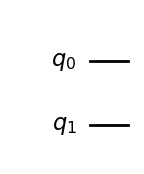

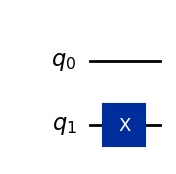

In [112]:
# --- Build the constant oracle --- 
# Constant Oracle 0
constant_oracle_0 = QuantumCircuit(2)

display(constant_oracle_0.draw('mpl'))

# Constant Oracle 1
constant_oracle_1.x(1)

display(constant_oracle_1.draw('mpl'))

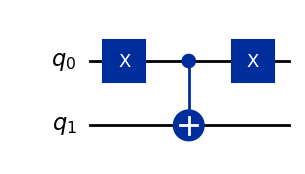

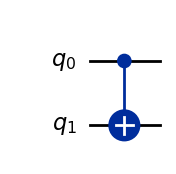

In [185]:
# Build a balanced oracle
# Balanced Inverted Oracle
balanced_oracle_invert = QuantumCircuit(2)
balanced_oracle_invert.x(0)
balanced_oracle_invert.cx(0, 1)
balanced_oracle_invert.x(0)

display(balanced_oracle_invert.draw('mpl'))

# Balanced Identity Oracle
balanced_oracle_identity = QuantumCircuit(2)
balanced_oracle_identity.cx(0, 1)

display(balanced_oracle_identity.draw('mpl'))

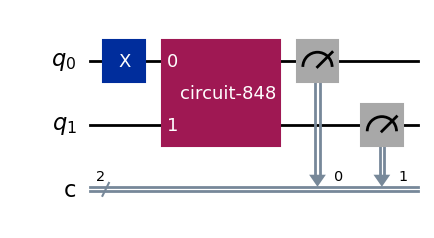

Counts for input |0,0>:, {'01': 20}


In [186]:
# -- Test the oracle --
qc = QuantumCircuit(2, 2)
qc.x(0)

# qc.append(constant_oracle_0.to_gate(), [0, 1])
# qc.append(constant_oracle_1.to_gate(), [0, 1])

# qc.append(balanced_oracle_identity.to_gate(), [0, 1])
qc.append(balanced_oracle_invert.to_gate(), [0, 1])

qc.measure([0, 1], [0, 1])

display(qc.draw('mpl'))

# Simulate
sim = AerSimulator()
qc_compiled = transpile(qc, sim)

result = sim.run(qc_compiled, shots=20).result()
counts = result.get_counts()
print("Counts for input |0,0>:,", counts)

In [187]:
# Create Deutsch-Jozsa Circuit

def deutsh_jozsa(oracle):
    
    qc = QuantumCircuit(2, 1)
    qc.x(1)
    
    qc.h([0, 1])
    
    qc.append(oracle.to_gate(), [0, 1])
    qc.h(0)
    
    qc.measure(0, 0)
    
    display(qc.draw('mpl'))
    
    # Simulate
    sim = AerSimulator()
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=100).result()
    counts = result.get_counts()
    return counts


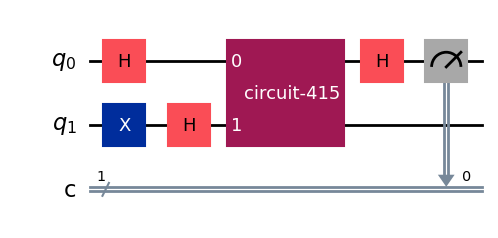

Constant 0:  {'0': 100}


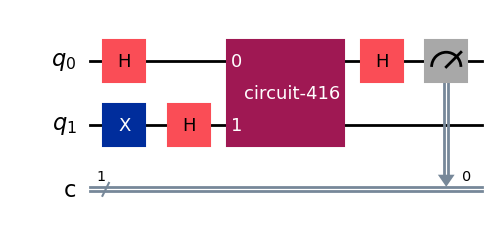

Constant 1:  {'0': 100}


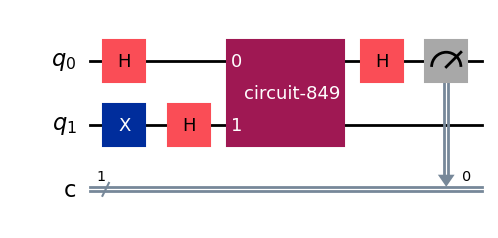

Balanced 1:  {'1': 100}


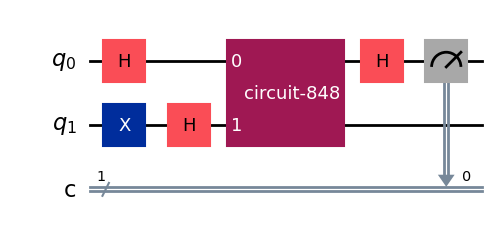

Balanced 0:  {'1': 100}


In [188]:
print("Constant 0: ", deutsh_jozsa(constant_oracle_0))
print("Constant 1: ", deutsh_jozsa(constant_oracle_1))
print("Balanced 1: ", deutsh_jozsa(balanced_oracle_identity))
print("Balanced 0: ", deutsh_jozsa(balanced_oracle_invert))